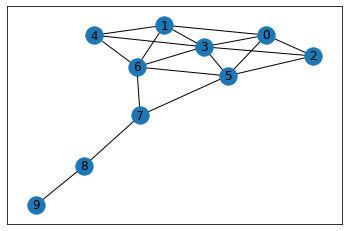

True
[1, 6, 7, 8, 9]
4


In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.krackhardt_kite_graph()
nx.draw_networkx(G)
plt.show()


print(nx.has_path(G, source=1, target=9))
print(nx.shortest_path(G, source=1, target=9))
print(nx.shortest_path_length(G, source=1, target=9))


Calcular todos los caminos más cortos por pares con una complejidad computacional de O(N^2)

In [2]:
paths = list(nx.all_pairs_shortest_path(G))

# para obtener el camino mas corto del nodo 5 al 8
paths[5][1].get(8) 


[5, 7, 8]

**Betweenness centrality**(centralidad entre nodos) :util para saber los nodos que son extremos en el grafo

In [3]:
# un valos de 0 indica que ningun camnino minimo pasa por ese nodo con valor cero
print(nx.betweenness_centrality(G))


{0: 0.023148148148148143, 1: 0.023148148148148143, 2: 0.0, 3: 0.10185185185185183, 4: 0.0, 5: 0.23148148148148148, 6: 0.23148148148148148, 7: 0.38888888888888884, 8: 0.2222222222222222, 9: 0.0}


**Degree centrality**: percentage of the vertexes that are incident upon a node

In [4]:
print(nx.degree_centrality(G))

{0: 0.4444444444444444, 1: 0.4444444444444444, 2: 0.3333333333333333, 3: 0.6666666666666666, 4: 0.3333333333333333, 5: 0.5555555555555556, 6: 0.5555555555555556, 7: 0.3333333333333333, 8: 0.2222222222222222, 9: 0.1111111111111111}


**Closeness centrality**: calcula la dsitancia media a los demas nodos del arbol. This
results in a score between 0 (the greater average distance) and 1 (thelower average distance).
 
**Harmonic centrality**: similar a la closeness(proximidad), pero usa los recíprocos de las distancias

In [5]:
print("CLoseness centrality :   ", nx.closeness_centrality(G), "\n")
print("Harmonic centrality  :   ", nx.harmonic_centrality(G))


CLoseness centrality :    {0: 0.5294117647058824, 1: 0.5294117647058824, 2: 0.5, 3: 0.6, 4: 0.5, 5: 0.6428571428571429, 6: 0.6428571428571429, 7: 0.6, 8: 0.42857142857142855, 9: 0.3103448275862069} 

Harmonic centrality  :    {0: 6.083333333333333, 1: 6.083333333333333, 2: 5.583333333333333, 3: 7.083333333333333, 4: 5.583333333333333, 5: 6.833333333333333, 6: 6.833333333333333, 7: 6.0, 8: 4.666666666666666, 9: 3.4166666666666665}


**Eigenvector centrality**: si los nodos fueran web pages y las aristas links a ellas. esta centra lidad calcula la probabilidad de visitar un nodo(web page).

In [6]:
print(nx.eigenvector_centrality(G))

{0: 0.35220898139203594, 1: 0.35220898139203594, 2: 0.28583473531632414, 3: 0.48102048812210046, 4: 0.28583473531632414, 5: 0.3976910106255469, 6: 0.3976910106255469, 7: 0.19586185175360382, 8: 0.048074775014202945, 9: 0.01116405857582424}


**Clustering Coefficent**: proporcion de nodos que son vecino de un nodo y tambien son vecinos entre ellos(forman un triangulo)

In [7]:
nx.clustering(G)

{0: 0.6666666666666666,
 1: 0.6666666666666666,
 2: 1.0,
 3: 0.5333333333333333,
 4: 1.0,
 5: 0.5,
 6: 0.5,
 7: 0.3333333333333333,
 8: 0,
 9: 0}

## Metodo de Luovian para extraer comunidades en redes grandes

Community 0
[0, 46, 50, 61, 73, 74, 75, 82, 86, 96]
Community 1
[1, 2, 9, 16, 20, 28, 29, 35, 57, 65, 78, 83, 89, 93]
Community 2
[3, 13, 31, 33]
Community 3
[4, 7, 15, 34, 39, 44, 53, 66, 85, 87, 90, 91, 92]
Community 4
[5, 14, 19, 21, 32, 37, 38, 40, 52, 64, 71, 72, 76, 77, 79, 94]
Community 5
[6, 18, 24, 43, 48, 54, 58, 97]
Community 6
[8, 17, 22, 41, 55, 62, 67, 70, 84]
Community 7
[10, 27, 45, 49, 59, 95]
Community 8
[11, 12, 23, 60, 68, 80, 81, 88, 98, 99]
Community 9
[25, 26, 30, 36, 42, 47, 51, 56, 63, 69]


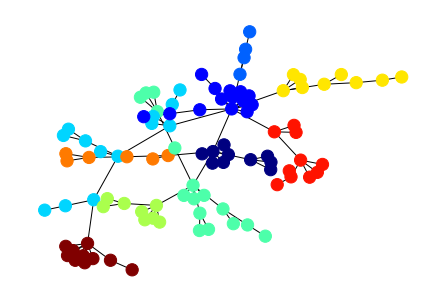

Modularity score: 0.7941026425874911


In [11]:
# Module for community detection and clustering
# Fue necesario copiar la carpeta para site-packeages
import community 


G = nx.powerlaw_cluster_graph(100, 1, .4, seed=101)
partition = community.best_partition(G)
# ya networkx trae una implementacion del algoritmo 
# partition = nx.algorithms.community.best_partition(G)


for i in set(partition.values()):
   print("Community", i)
   members = [nodes for nodes in partition.keys()  if partition[nodes] == i]
   print(members)

values = [partition.get(node) for node in G.nodes()]
nx.draw(G, pos=nx.fruchterman_reingold_layout(G),
        cmap = plt.get_cmap('jet'), 
        node_color = values, 
        node_size=150,
        with_labels=False)
plt.show()

print ("Modularity score:", community.modularity(partition, G))


## **Coloreado de grafos**
Esta clase de algoritmos es NP-hard, y es casi
imposible encontrar la solución óptima, aunque existen muchas
aproximaciones para obtener soluciones subóptimas rápidamente.
NetworkX implementa una aproximación greedy para resolver el
problema de coloreado. Lo que devuelve la función es un diccionario que
contiene, para cada nodo (la clave en el diccionario), el color (el valor de
la clave en el diccionario)

{3: 0, 5: 1, 6: 2, 0: 2, 1: 1, 2: 3, 4: 3, 7: 0, 8: 1, 9: 0}


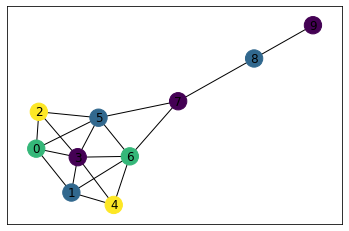

dict_keys([3, 5, 6, 0, 1, 2, 4, 7, 8, 9])

In [13]:
G = nx.krackhardt_kite_graph()
d = nx.coloring.greedy_color(G)
print(d)
nx.draw_networkx(G, node_color=[d[n] for n in sorted(d.keys())])
plt.show()
